In [1]:
cop = '../out/correlations/UWOP.cop.tsv'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import numpy as np
import pandas as pd

In [4]:
m = pd.read_table(cop, index_col=[0, 1])

In [5]:
idx = {tuple(sorted((g1, g2))) for g1,g2 in m.index}

In [6]:
len(idx)

8058105

In [7]:
import random
idx = sorted(idx)
random.shuffle(idx)
idx = set(idx[:100000])

In [8]:
m = m.loc[sorted(idx)]

In [9]:
from scipy import stats

In [99]:
prob = np.empty(m.shape[0])
prob[m['cop'] >= m['cop'].mean()] = stats.norm.sf(m[m['cop'] >= m['cop'].mean()]['cop'],
                                                  loc=m['cop'].mean(),
                                                  scale=m['cop'].std())
prob[m['cop'] < m['cop'].mean()] = stats.norm.cdf(m[m['cop'] < m['cop'].mean()]['cop'],
                                                  loc=m['cop'].mean(),
                                                  scale=m['cop'].std())
m['prob'] = prob
m['llr'] = np.log(m['cop'] / m['prob'])

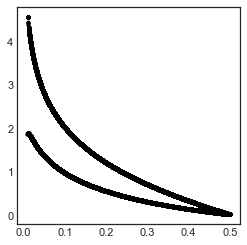

In [100]:
plt.figure(figsize=(4, 4))

plt.plot(m['prob'],
         m['llr'],
         'k.');

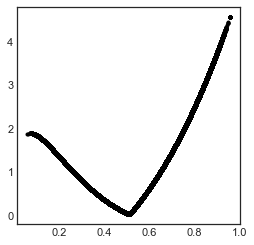

In [101]:
plt.figure(figsize=(4, 4))

plt.plot(m['cop'],
         m['llr'],
         'k.');

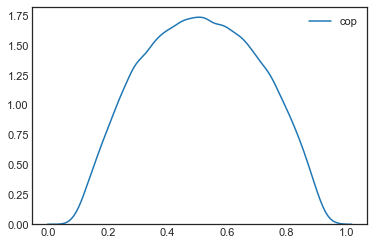

In [102]:
sns.kdeplot(m['cop']);

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>